# python和数据结构

Python's:

- `list`
- `dict`
- `string`
- `tuple`
- `set`

Course implementations:

- `tree`
- `matrix`
- `hashtable`
- **`linked list`**

## 1. Linked list 链表

A dynamic structure, location in memory is not consecutive. 

Some operations become $O(1)$, on the expence of others (especially access).

[![Linked List view](http://greenteapress.com/thinkpython/html/illustrations/link2.png)](http://greenteapress.com/thinkpython/html/chap17.html)

In [3]:
class Node:
    def __init__(self, val):
        self.value = val
        self.next = None
        
    def __repr__(self):
        return str(self.value)

In [4]:
node1 = Node(1)
node2 = Node(2)
node1.next = node2
node3 = Node(3)
node2.next = node3

In [1]:
class LinkedList:
    def __init__(self):
        self.first = None

    def __repr__(self):
        out = "["
        curr = self.first
        while curr:
            out += str(curr) + ", "
            curr = curr.next
        return out[:-2] + "]"

In [6]:
lst = LinkedList()
lst.first = node1
lst

[1, 2, 3]

Iterating the list, as done is `__repr__`, can be done by advancing the current node to the next untill reaching a `None`:

![Iterating a linked list](http://greenteapress.com/thinkpython/html/illustrations/link3.png)

Now we will implement some more methods:

In [7]:
class LinkedList:
    def __init__(self):
        self.first = None

    def __repr__(self):
        out = "["
        curr = self.first
        while curr:
            out += str(curr) + ", "
            curr = curr.next
        return out[:-2] + "]"
        
    def length(self):
        curr = self.first
        i = 0
        while curr:
            i += 1
            curr = curr.next
        return i
            
    def prepend(self, value):
        node = Node(value)
        if not self.first:
            self.first = node
        else:
            self.first, node.next = node, self.first
    
    def append(self, value):
        node = Node(value)
        curr = self.first
        if not curr:
            self.first = node
        else:
            while curr.next:
                curr = curr.next
            curr.next = node

    def insert(self, index, value):
        curr = self.first
        for i in range(index - 1):
            if not curr or not curr.next:
                raise IndexError()
            curr = curr.next
        node = Node(value)
        curr.next, node.next = node, curr.next

    def remove(self, index):
        curr = self.first
        # iterate to the one before the one to be removed
        for i in range(index - 1):
            if not curr or not curr.next:
                raise IndexError
            curr = curr.next
        curr.next = curr.next.next
            
    def get(self, index):
        curr = self.first
        for i in range(index):
            if not curr or not curr.next:
                raise IndexError
            curr = curr.next
        return curr.value
            
    def index(self, value):
        curr = self.first
        i = 0
        while curr:
            if curr.value == value:
                return i
            curr = curr.next
            i += 1
        raise ValueError()

In [8]:
node1 = Node(1)
node2 = Node(2)
node1.next = node2
node3 = Node(3)
node2.next = node3
lst = LinkedList()
lst.first = node1

print(lst)
print(lst.length())
lst.prepend(0)
print(lst)
lst.append(4)
print(lst)
lst.insert(2, 1.5)
print(lst)
lst.remove(2)
print(lst)
print(lst.get(2))
print(lst.index(2))

[1, 2, 3]
3
[0, 1, 2, 3]
[0, 1, 2, 3, 4]
[0, 1, 1.5, 2, 3, 4]
[0, 1, 2, 3, 4]
2
2


### Reverse

We want to reverse a linked list. We implement this as a mehtod just so we don't copy-paste the entire code from above - this can and should be a method.

In [9]:
def reverse(lst):
    prev = None
    curr = lst.first
    while curr:
        curr.next, prev, curr = prev, curr, curr.next
    lst.first = prev

In [10]:
print(lst)
reverse(lst)
print(lst)

[0, 1, 2, 3, 4]
[4, 3, 2, 1, 0]


https://blog.csdn.net/qq_42351880/article/details/88637387

## 2. Queue 队列

We want to have a first-in-first-out (FIFO) data structure so that we can:

-	push/enqueue: insert an element to the top of the queue
-	pop/dequeue: remove an element from the bottom of the queue

How do our current ordered data structure deal with these tasks?

- hashtable
- list
- linked list

Lets try it. 

With a `list` implementation `push` and `pop` must be $O(1)$ and $O(n)$ or vice versa, as `append` and `pop()` are $O(1)$ but `insert(0)` and `pop(0)` are $O(n)$.

We will implement it so that `push` is cheap:

In [11]:
class QueueList:
    def __init__(self):
        self.lst = []
    
    def __repr__(self):
        return self.lst.__repr__()

    def push(self, value):
        self.lst.append(Node(value))

    def pop(self):
        return self.lst.pop(0)

q1 = QueueList()
q1.push(1)
q1.push(2)
q1.push(3)
print(q1.pop())
q1

1


[2, 3]

With a linked list it's the other way around - `prepend` and `remove(0)` are $O(1)$ but `append` and `remove(-1)` are $O(n)$. We will push to the head so that we get a cheap push:

In [12]:
class QueueLinkedList: 
    def __init__(self): 
        self.head = None 

    def __repr__(self):
        out = "["
        curr = self.head
        while curr:
            out += str(curr) + ", "
            curr = curr.next
        return out[:-2] + "]"

    def push(self, value): 
        node = Node(value)
        if self.head == None:
            self.head = node
        else:
            self.head, node.next = node, self.head
  
    def pop(self):
        if self.head != None:
            curr, prev = self.head, None
            while curr.next:
                curr, prev = curr.next, curr
            prev.next = None
            return curr.value

q2 = QueueLinkedList()
q2.push(1)
q2.push(2)
q2.push(3)
print(q2.pop())
q2

1


[3, 2]

Lets check performence:

In [13]:
q1 = QueueList()
q2 = QueueLinkedList()
for i in range(10**5): 
    q1.push(1)
    q2.push(1)

In [20]:
%timeit -n 100 q1.push(1)
%timeit -n 100 q2.push(1)

100 loops, best of 3: 1.12 us per loop
100 loops, best of 3: 1.37 us per loop


In [21]:
%timeit -n 100 q1.pop()
%timeit -n 100 q2.pop()

100 loops, best of 3: 68.3 us per loop
100 loops, best of 3: 23.1 ms per loop


So indeed `push` is cheap and `pop` is expensive, much more so in the linked list because `list` is implemented in C.

We want a data structure where both `push` and `pop` are $O(1)$.

- linked list with tail reference!

We will keep track of the `head` and the `tail` and so both `push` and `pop` can be $O(1)$:

In [14]:
class TailedQueueLinkedList: 
    def __init__(self): 
        self.head   = None 
        self.tail   = None 

    def __repr__(self):
        out = "["
        curr = self.head
        while curr:
            out += str(curr) + ", "
            curr = curr.next
        if len(out) > 2:
            out = out[:-2]
        return out + "]"

    def push(self, value): 
        node = Node(value)
        if self.head == None:
            # empty queue
            self.head, self.tail = node, node
        else:
            # push to the tail. can you think of a way to push from the head? where will you pop from?
            self.tail.next, self.tail = node, node

    def pop(self):
        # pop from the head
        if self.head != None:
            node = self.head
            self.head = self.head.next    
            return node.value

q3 = TailedQueueLinkedList()
q3.push(1)
q3.push(2)
q3.push(3)
print(q3.pop())
q3

1


[2, 3]

In [41]:
q1 = QueueList()
q2 = QueueLinkedList()
q3 = TailedQueueLinkedList()
for i in range(10**5): 
    q1.push(1)
    q2.push(1)
    q3.push(1)

In [42]:
%timeit -n 100 q1.push(1)
%timeit -n 100 q2.push(1)
%timeit -n 100 q3.push(1)

100 loops, best of 3: 1.13 us per loop
100 loops, best of 3: 1.38 us per loop
100 loops, best of 3: 1.37 us per loop


In [43]:
%timeit -n 100 q1.pop()
%timeit -n 100 q2.pop()
%timeit -n 100 q3.pop()

100 loops, best of 3: 68.5 us per loop
100 loops, best of 3: 24.9 ms per loop
100 loops, best of 3: 1.04 us per loop


And indeed the tailed linked list keeps a low time for both `push` and `pop`.

## 树和迷宫

https://blog.csdn.net/Eyizoha/article/details/89407054

https://www.jianshu.com/p/9503238394df

# Iterators 迭代器

We want to be able to do:

    for element in seq:
        ...

`seq` must be iterable -> must have a method named `__iter__`.

In [2]:
class A:
    def __init__(self):
        self.values = [1,2,3,4]

    def __repr__(self):
        return str(self.values)

In [3]:
a = A()
a

[1, 2, 3, 4]

In [15]:
for x in a:
    print(x)

TypeError: 'A' object is not iterable

###  可迭代 iterable 包含iter

In [23]:
class A:
    ''' using the built-in iterator of list '''
    def __init__(self):
        self.values = [1,2,3,4]

    def __repr__(self):
        return str(self.values)

    def __iter__(self): #now A is iterable
        return iter(self.values) 	#returns the iterator class of a list

可以for迭代

In [24]:
a = A()
for x in a:
    print(x)

1
2
3
4


也可以强转列表

In [25]:
list(iter(a))

[1, 2, 3, 4]

但是还不可以用next迭代

In [22]:
next(a)

TypeError: 'A' object is not an iterator

### 迭代器 iterator 包含iter和next

In [4]:
class B:
    ''' using our own iterator class: BIterator '''
    def __init__(self):
        self.values = [1,2,3,4]
        self.counts = [3,4,0,1]

    def __repr__(self):
        return str(self.values) + "\n" + str(self.count)
    
    def __iter__(self):
        return BIterator(self.values, self.counts)

class BIterator():
    ''' iterator of B, must have __next__ '''
    def __init__(self, values, counts):
        self.index = 0
        self.lst = [values[i] for i in range(len(values)) for j in range(counts[i])]
        
    def __next__(self):
        if self.index < len(self.lst):
            res = self.lst[self.index]
            self.index += 1
            return res
        raise StopIteration

In [7]:
b = B()
for x in b:
    print(x, end=", ")

1, 1, 1, 2, 2, 2, 2, 4, 

斐波那契迭代器

In [41]:
class fibb:
    def __init__(self):
        self.prev = 0
        self.curr = 1
 
    def __iter__(self):
        return self
 
    def __next__(self):
        value = self.curr
        self.curr += self.prev
        self.prev = value
        return value

In [42]:
f = fibb()
for i in f:
    if i>1000:
        break
    else:
        print(i,end = " ")

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 

### 内置iter函数  将容器变为迭代器

In [13]:
a = [1,2,3,4,5]
b = iter(a)

In [19]:
next(b)

StopIteration: 

In [32]:
for i in b:
    print(i)

1
2
3
4
5


In [35]:
next(b)

1

In [53]:
c = iter(a)
print(next(c))
print(next(c))
print(next(c))
print(next(c))

1
2
3
4


range 不是迭代器 他是惰性可迭代对象

In [11]:
dir(BIterator)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [2]:
type(range(5))

range

In [3]:
dir(range)

['__bool__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'count',
 'index',
 'start',
 'step',
 'stop']

## 4. Generators 生成器

Instead a separate class for the iterator, `__iter__` can use `yield`.

This is called a **generator** (as it generates an iterator):

In [76]:
class C:
    ''' a generator example using yield '''
    
    def __init__(self):
        self.values = [1,2,3,4]
        self.counts = [3,4,0,1]

    def __repr__(self):
        return str(self.values) + "\n" + str(self.count)
    
    def __iter__(self):
        for i in range(len(self.values)):
            for j in range(self.counts[i]):
                yield self.values[i]

In [78]:
c = C()
for x in c:
    print(x, end=", ")

1, 1, 1, 2, 2, 2, 2, 4, 

Generators involve lazy evaluation – one element is created at a time.

`range` is a generator we already know. Lets compare `range` with `list(range)`:

In [3]:
for i in list(range(10**8)):
    pass

In [4]:
for i in range(10**8):
    pass

![List vs Generator](https://raw.github.com/yoavram/CS1001.py/master/list_vs_generator.png)

If you want to try this at home, you need to run this while having a process monitor tool open (Windows: Task Manager, Linux: top):

You can also use generators to run an "infinite" for loop.

Suppose you want to iterate the natural numbers:

In [6]:
def natural_numbers():
    n = 0
    while True:
        n += 1
        yield n

In [9]:
for n in natural_numbers():
    if n % 667 == 0 and n**2 % 766 == 0:
        break
print(n)

510922


You can also use "generator compehension" instead of "list comprehension" to save memory and to perform lazy init to save runtime because you know you won't use all of them:

In [21]:
evens_less_than_1e6_list = [x for x in range(1, 10**6) if x % 2 == 0]
%timeit -n 3 [x for x in range(1, 10**6) if x % 2 == 0]

3 loops, best of 3: 637 ms per loop


In [22]:
evens_less_than_1e6_generator = (x for x in range(1, 10**6) if x % 2 == 0)
%timeit -n 3 (x for x in range(1, 10**6) if x % 2 == 0)

3 loops, best of 3: 6.64 us per loop


In [32]:
import sys
sys.getsizeof(evens_less_than_1e6_list), sys.getsizeof(evens_less_than_1e6_generator)

(4290016, 72)

## 生成器表达式

**建议多使用生成式**

In [20]:
def isP(x):
    for i in range(x-1,1,-1):
        if x%i == 0:
            return False
    return True

g = (i for i in range(2,101) if isP(i))

In [37]:
#sum(g)

In [21]:
for i in g:
    print(i,end = " ")

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 73 79 83 89 97 

In [22]:
sum(g)

0

第二次求g的sum时 g已经生成完毕 火箭发射完毕抛弃壳子了 啥都没了 所以求和不会得到结果

## 生成器函数

有限生成器 返回一个1到100的平方序列生成器

In [1]:
def ss():
    for i in range(1,101):
        yield i*i

In [4]:
print(ss())

<generator object ss at 0x7efc34dddf10>


In [6]:
s = ss()
for i in s:
    print(i,end=" ")

1 4 9 16 25 36 49 64 81 100 121 144 169 196 225 256 289 324 361 400 441 484 529 576 625 676 729 784 841 900 961 1024 1089 1156 1225 1296 1369 1444 1521 1600 1681 1764 1849 1936 2025 2116 2209 2304 2401 2500 2601 2704 2809 2916 3025 3136 3249 3364 3481 3600 3721 3844 3969 4096 4225 4356 4489 4624 4761 4900 5041 5184 5329 5476 5625 5776 5929 6084 6241 6400 6561 6724 6889 7056 7225 7396 7569 7744 7921 8100 8281 8464 8649 8836 9025 9216 9409 9604 9801 10000 

无限生成器  返回一个斐波那契数列生成器

In [47]:
def fibb():
    p,c = 0,1
    while True:
        yield c
        p,c = c,p+c

In [48]:
f = fibb()
for i in f:
    if i>1000:
        break
    else:
        print(i,end = " ")

1 1 2 3 5 8 13 21 34 55 89 144 233 377 610 987 

In [ ]:
def fib_yield_while(max):
    '''斐波那契数列生成器'''
  	a, b = 0, 1
  	while max > 0:
    	a, b = b, a+b
    	max -= 1
    	yield a
        
def fib_yield_for(n):
    a, b = 0, 1
    for _ in range(n):
        a, b = b, a + b
        yield a

for i in fib_yield_for(10):
    print(i, end=' ')

In [ ]:
class Fibonacci(object):
    """斐波那契数列迭代器"""

    def __init__(self, n):
        """
        :param n:int 指 生成数列的个数
        """
        self.n = n
        # 保存当前生成到的数据列的第几个数据，生成器中性质，记录位置，下一个位置的数据
        self.current = 0
        # 两个初始值
        self.a = 0
        self.b = 1

    def __next__(self):
        """当使用next()函数调用时，就会获取下一个数"""
        if self.current < self.n:
            self.a, self.b = self.b, self.a + self.b
            self.current += 1
            return self.a
        else:
            raise StopIteration

    def __iter__(self):
        """迭代器的__iter__ 返回自身即可"""
        return self


if __name__ == '__main__':
    fib = Fibonacci(15)
    for num in fib:
        print(num)

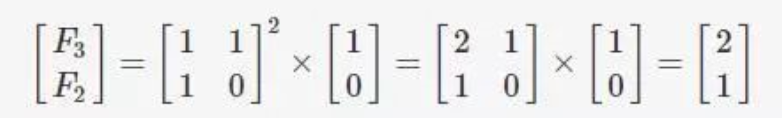

In [2]:
import numpy as np

### 1
def fib_matrix(n):
    for i in range(n):
        res = pow((np.matrix([[1, 1], [1, 0]], dtype='int64')), i) * np.matrix([[1], [0]])
        print(int(res[0][0]))


# 调用
fib_matrix(50)

### 2
# 使用矩阵计算斐波那契数列
def Fibonacci_Matrix_tool(n):
    Matrix = np.matrix("1 1;1 0", dtype='int64')
    # 返回是matrix类型
    return np.linalg.matrix_power(Matrix, n)

def Fibonacci_Matrix(n):
    result_list = []
    for i in range(0, n):
        result_list.append(np.array(Fibonacci_Matrix_tool(i))[0][0])
    return result_list

# 调用
Fibonacci_Matrix(50)

### pow 速度 比 双**号快, np.linalg.matrix_power也是一种方法

1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181
6765
10946
17711
28657
46368
75025
121393
196418
317811
514229
832040
1346269
2178309
3524578
5702887
9227465
14930352
24157817
39088169
63245986
102334155
165580141
267914296
433494437
701408733
1134903170
1836311903
2971215073
4807526976
7778742049
12586269025


[1,
 1,
 2,
 3,
 5,
 8,
 13,
 21,
 34,
 55,
 89,
 144,
 233,
 377,
 610,
 987,
 1597,
 2584,
 4181,
 6765,
 10946,
 17711,
 28657,
 46368,
 75025,
 121393,
 196418,
 317811,
 514229,
 832040,
 1346269,
 2178309,
 3524578,
 5702887,
 9227465,
 14930352,
 24157817,
 39088169,
 63245986,
 102334155,
 165580141,
 267914296,
 433494437,
 701408733,
 1134903170,
 1836311903,
 2971215073,
 4807526976,
 7778742049,
 12586269025]

生成一个自然数的无限生成器

In [49]:
def natural_numbers():
    n = 0
    while True:
        n += 1
        yield n

找到5673和987的最小公倍数

In [50]:
for i in natural_numbers():
    if i%5673 == 0 and i%987 == 0:
        print(i)
        break

1866417


In [1]:
def _odd_iter():
    n = 1
    while True:
        n = n + 2
        yield n

def _not_divisible(n):
    print('add filter for all multiples of', n)
    return lambda x: print('check if', x, 'is divisible by', n, 'result: ', not (x % n > 0)) or x % n > 0

def primes():
    yield 2
    it = _odd_iter()
    while True:
        n = next(it)
        yield n
        it = filter(_not_divisible(n), it)

for n in primes():
    if n < 20:
        print(n)
    else:
        break

2
3
add filter for all multiples of 3
check if 5 is divisible by 3 result:  False
5
add filter for all multiples of 5
check if 7 is divisible by 3 result:  False
check if 7 is divisible by 5 result:  False
7
add filter for all multiples of 7
check if 9 is divisible by 3 result:  True
check if 11 is divisible by 3 result:  False
check if 11 is divisible by 5 result:  False
check if 11 is divisible by 7 result:  False
11
add filter for all multiples of 11
check if 13 is divisible by 3 result:  False
check if 13 is divisible by 5 result:  False
check if 13 is divisible by 7 result:  False
check if 13 is divisible by 11 result:  False
13
add filter for all multiples of 13
check if 15 is divisible by 3 result:  True
check if 17 is divisible by 3 result:  False
check if 17 is divisible by 5 result:  False
check if 17 is divisible by 7 result:  False
check if 17 is divisible by 11 result:  False
check if 17 is divisible by 13 result:  False
17
add filter for all multiples of 17
check if 19 is

## itertools

count  
cycle  
repeat  
groupby  
chain

# 概念区分

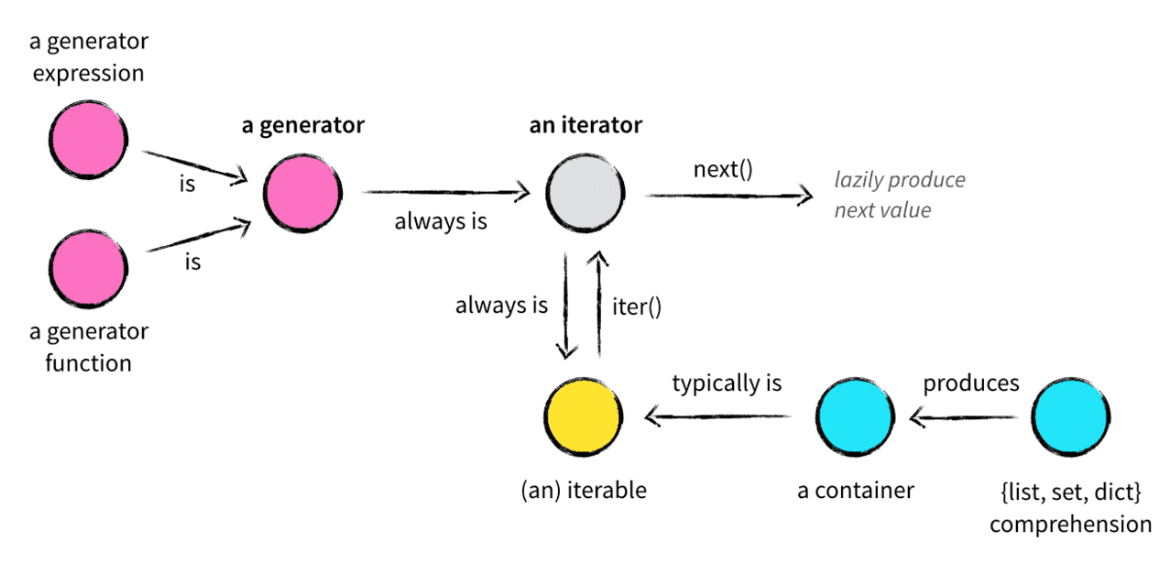

* 列表解析式　　　列表理解式 列表推导式  同一码事啦  都是container comprehension

* 容器　　　　　　一般都是可以迭代的 a container typically is an iterable item     特例是bloomfilter只能看在不在 不能访问

* 生成器　　　　　生成器函数（generator function）和 生成器表达式（generator expression）  都可以得到一个 generator 生成器  

* 迭代器　　　　　使用iter()方法，才可以调用返回一个迭代对象（切记这里和iter方法和__ iter __方法的区别），然后使用next()方法实现迭代 迭代器类似一次性指针 用过即抛

## 5. for循环迭代的本质 可迭代协议

In [ ]:
for x in [1, 2, 3, 4, 5]:
    pass

In [ ]:
# 首先获取可迭代对象
it = iter([1, 2, 3, 4, 5])
while True:
    try:
        next(it)
    except StopIteration:
        # 遇到StopIteration就跳出循环, 且自动频闭StopIteration异常
        break

## 6. 上下文协议

__enter__ 和 __exit__

In [14]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2016 Python3 推荐教材编程：从入门到实践.pdf',
 '2016 Python编程快速上手  让繁琐工作自动化.pdf',
 '2017 Python极客项目编程.pdf',
 '778496-20180713200909560-1043089630.png',
 'Advance_Python.ipynb',
 'Application_Python.ipynb',
 'backup',
 'content.txt.txt',
 'Coroutines.pdf',
 'eiffel.bitmap',
 'generator.png',
 'L1_python初级数据结构.ipynb',
 'L2_函数是一等公民.ipynb',
 'L3_一切皆对象 初级oop.ipynb',
 'L4_数据结构和迭代深入协议.ipynb',
 'L5_并发并行进程线程协程 回调地狱.ipynb',
 'L6_文本和字符 正则 eval 数据操作.ipynb',
 'oop.png',
 'python.png',
 'test.py',
 'tmp',
 'total_python3太大了打开慢 - 副本.ipynb',
 'UB_python基础.rar',
 'Untitled.ipynb',
 '提纲.txt',
 '课程进度记录.xlsx',
 '面向对象参考.ipynb']

In [18]:
print('.\n')

.



In [19]:
print(r'.\n')

.\n


In [20]:
print('.\\n')

.\n


In [24]:
import json
with open('L1_python初级数据结构.ipynb',encoding='UTF-8') as fp:
    cont = json.load(fp)

cont

{'cells': [{'cell_type': 'markdown',
   'metadata': {},
   'source': ['<img src="python.png">']},
  {'cell_type': 'code',
   'execution_count': 1,
   'metadata': {},
   'outputs': [{'data': {'text/plain': ['int']},
     'execution_count': 1,
     'metadata': {},
     'output_type': 'execute_result'}],
   'source': ['type(5)']},
  {'cell_type': 'code',
   'execution_count': 3,
   'metadata': {'collapsed': True},
   'outputs': [],
   'source': ['a=10000\n', 'b=a']},
  {'cell_type': 'code',
   'execution_count': 4,
   'metadata': {},
   'outputs': [{'data': {'text/plain': ['140659982493648']},
     'execution_count': 4,
     'metadata': {},
     'output_type': 'execute_result'}],
   'source': ['id(a)']},
  {'cell_type': 'code',
   'execution_count': 5,
   'metadata': {},
   'outputs': [{'data': {'text/plain': ['140659982493648']},
     'execution_count': 5,
     'metadata': {},
     'output_type': 'execute_result'}],
   'source': ['id(b)']},
  {'cell_type': 'code',
   'execution_count': 6

In [26]:
cont.keys()

dict_keys(['cells', 'metadata', 'nbformat', 'nbformat_minor'])

In [28]:
len(cont['cells'])

210

In [29]:
cont['metadata']

{'kernelspec': {'display_name': 'Python 3',
  'language': 'python',
  'name': 'python3'},
 'language_info': {'codemirror_mode': {'name': 'ipython', 'version': 3},
  'file_extension': '.py',
  'mimetype': 'text/x-python',
  'name': 'python',
  'nbconvert_exporter': 'python',
  'pygments_lexer': 'ipython3',
  'version': '3.6.10'},
 'toc': {'base_numbering': 1,
  'nav_menu': {'height': '86px', 'width': '182px'},
  'number_sections': True,
  'sideBar': True,
  'skip_h1_title': False,
  'title_cell': 'Table of Contents',
  'title_sidebar': 'Contents',
  'toc_cell': False,
  'toc_position': {'height': 'calc(100% - 180px)',
   'left': '10px',
   'top': '150px',
   'width': '273.188px'},
  'toc_section_display': True,
  'toc_window_display': True},
 'varInspector': {'cols': {'lenName': 16, 'lenType': 16, 'lenVar': 40},
  'kernels_config': {'python': {'delete_cmd_postfix': '',
    'delete_cmd_prefix': 'del ',
    'library': 'var_list.py',
    'varRefreshCmd': 'print(var_dic_list())'},
   'r': {

In [30]:
cont['nbformat']

4

In [ ]:
with open('L1_python初级数据结构.ipynb',encoding='UTF-8') as fp:
    json.dump(cont)

### contexlib和closing 装饰器

## 7. 可哈希协议 

__hash__ 和 __eq__

In [1]:
class VisitRecord:
    """旅游记录
    """
    def __init__(self, first_name, last_name, phone_number, date_visited):
        self.first_name = first_name
        self.last_name = last_name
        self.phone_number = phone_number
        self.date_visited = date_visited

    def __hash__(self):
        return hash(
            (self.first_name, self.last_name, self.phone_number)
        )
    def __eq__(self, other):
        # 当两条访问记录的名字与电话号相等时，判定二者相等。
        if isinstance(other, VisitRecord) and hash(other) == hash(self):
            return True
        return False